In [25]:
import pickle

ho_ham = pickle.load(open("ho_hamiltonian.p", "rb"))
aho_ham = pickle.load(open("aho_hamiltonian.p", "rb"))

## Harmonic Oscillator from 0000

In [26]:
import sys
sys.path.append('..')
from src.qiskit_utilities import *

trotter_step = pauli_string_to_trotter_step(ho_ham,1)

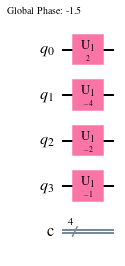

In [27]:
from qiskit import QuantumCircuit, transpile
from src.sympy_utilities import *

nqubits = max_sympy_exponent(ho_ham)+1
qc = QuantumCircuit(nqubits, nqubits)
qc.append(trotter_step, [i for i in range(nqubits)])
transpile(qc, basis_gates = ['cx', 'u1', 'u2', 'u3', 'H', 'X', 'Y', 'Z']).draw('mpl')

In [28]:
from qiskit import (
    execute,
    Aer)
from qiskit.providers.aer.noise import NoiseModel
from qiskit import IBMQ
from qiskit.visualization import plot_histogram

provider = IBMQ.load_account()

/home/chrisculver/miniconda3/envs/QuantumComputing/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-04-13 14:41:39,825: Credentials are already in use. The existing account in the session will be replaced.


In [29]:
noise_backend = provider.get_backend('ibmq_16_melbourne')
noise_model = NoiseModel.from_backend(noise_backend)

In [32]:
simulator = Aer.get_backend('qasm_simulator')

qc.measure([i for i in range(nqubits)],[i for i in range(nqubits)])

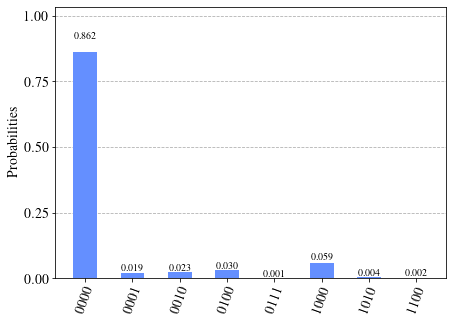

In [33]:
job = execute(qc, simulator, shots=1000, noise_model=noise_model)
result=job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

## Harmonic Oscillator from 1000

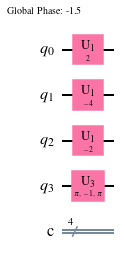

In [34]:
trotter_step = pauli_string_to_trotter_step(ho_ham,1)

nqubits = max_sympy_exponent(ho_ham)+1
qc = QuantumCircuit(nqubits, nqubits)
qc.x(nqubits-1)
qc.append(trotter_step, [i for i in range(nqubits)])
transpile(qc, basis_gates = ['cx', 'u1', 'u2', 'u3', 'H', 'X', 'Y', 'Z']).draw('mpl')

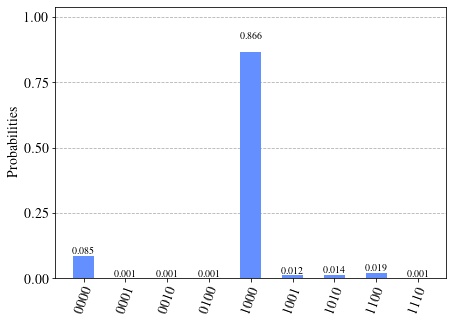

In [35]:
qc.measure([i for i in range(nqubits)],[i for i in range(nqubits)])
job = execute(qc, simulator, shots=1000, noise_model=noise_model)
result=job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

## Anharmonic Oscillator from 0000

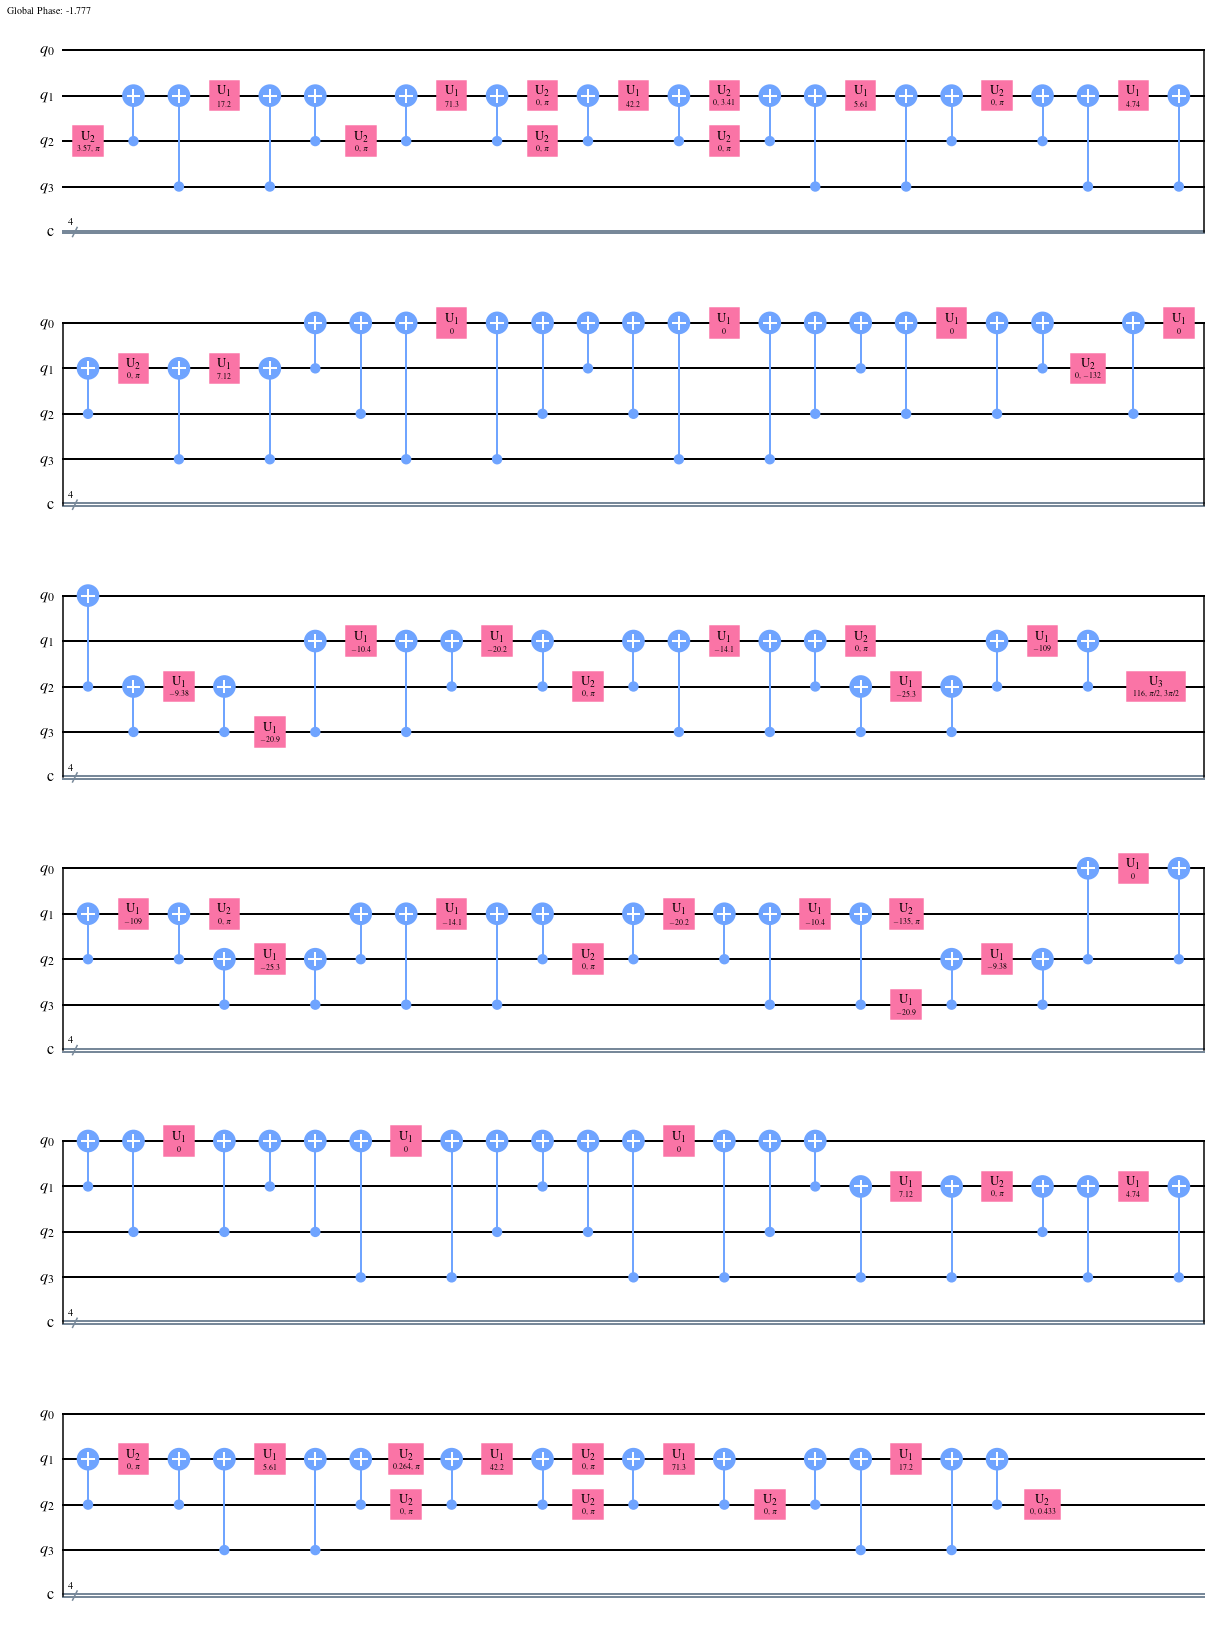

In [44]:
trotter_step = pauli_string_to_trotter_step(aho_ham,1)
nqubits = max_sympy_exponent(ho_ham)+1
qc = QuantumCircuit(nqubits, nqubits)
qc.append(trotter_step, [i for i in range(nqubits)])
transpile(qc, basis_gates = ['cx', 'u1', 'u2', 'u3', 'H', 'X', 'Y', 'Z']).draw('mpl')

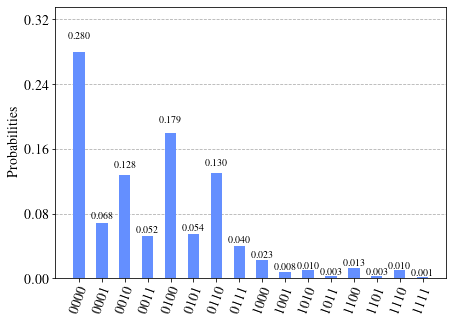

In [46]:
qc.measure([i for i in range(nqubits)],[i for i in range(nqubits)])
job = execute(qc, simulator, shots=4096, noise_model=noise_model)
result=job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

## Anharmonic oscillator from 1000

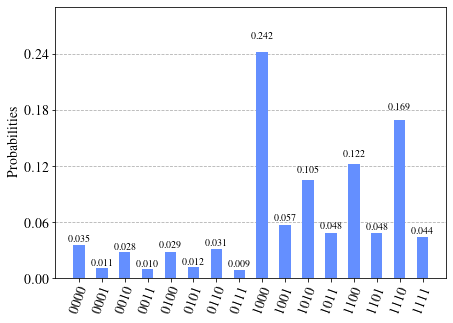

In [47]:
trotter_step = pauli_string_to_trotter_step(aho_ham,1)
nqubits = max_sympy_exponent(ho_ham)+1
qc = QuantumCircuit(nqubits, nqubits)

qc.x(nqubits-1)

qc.append(trotter_step, [i for i in range(nqubits)])
transpile(qc, basis_gates = ['cx', 'u1', 'u2', 'u3', 'H', 'X', 'Y', 'Z']).draw('mpl')

qc.measure([i for i in range(nqubits)],[i for i in range(nqubits)])
job = execute(qc, simulator, shots=4096, noise_model=noise_model)
result=job.result()
counts = result.get_counts(qc)
plot_histogram(counts)